# Cleaning data

In [1]:
# Importing needed libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(color_codes = True)

In [2]:
# Upload the files with data

df = pd.read_csv('Houses.csv', encoding = 'latin-1')

In [3]:
# Checking the data types

df.dtypes

Unnamed: 0      int64
address        object
city           object
floor         float64
id            float64
latitude      float64
longitude     float64
price         float64
rooms         float64
sq            float64
year          float64
dtype: object

In [4]:
# Change of data format in columns: 'floor', 'rooms', 'year' to integer

df['floor'] = pd.to_numeric(df['floor'], downcast='integer')
df['rooms'] = pd.to_numeric(df['rooms'], downcast='integer')
df['year'] = pd.to_numeric(df['year'], downcast='integer')
df.dtypes

Unnamed: 0      int64
address        object
city           object
floor            int8
id            float64
latitude      float64
longitude     float64
price         float64
rooms            int8
sq            float64
year            int16
dtype: object

In [5]:
# Removing columns from df that are not needed for the analysis

df = df.drop(['Unnamed: 0', 'id', 'latitude', 'longitude'] , axis = 1)
df.head()

,address,city,floor,price,rooms,sq,year
0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2,749000.0,3,74.05,2021
1,Praga-Po³udnie Grochowska,Warszawa,3,240548.0,1,24.38,2021
2,Krowodrza Czarnowiejska,Kraków,2,427000.0,2,37.00,1970
3,Grunwald,Poznañ,2,1290000.0,5,166.00,1935
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1,996000.0,5,105.00,2020


In [6]:
# Rename columns (not needed, but looks better)

df = df.rename(columns = {'address':'Address', 
                          'city':'City', 
                          'floor':'Floor', 
                          'price':'Price', 
                          'rooms':'Rooms', 
                          'year':'Year' })

In [7]:
# Checking the total number of rows and columns

df.shape

(23764, 7)

In [8]:
# Checking the rows containing duplicate data

duplicate_rows_df = df[df.duplicated()]
print('Number od duplicate rows: ' , duplicate_rows_df.shape)

Number od duplicate rows:  (1539, 7)


In [9]:
# Used to count the number of rows before removing the data

df.count()

Address    23764
City       23764
Floor      23764
Price      23764
Rooms      23764
sq         23764
Year       23764
dtype: int64

In [10]:
# Removing duplicates from df

df.drop_duplicates(inplace=True)

In [11]:
# Counting the number of rows after removing duplicates

df.count()

Address    22225
City       22225
Floor      22225
Price      22225
Rooms      22225
sq         22225
Year       22225
dtype: int64

In [12]:
# Checking data for empty cells

df.info()

# This means that there are no empty values in this df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22225 entries, 0 to 23763
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  22225 non-null  object 
 1   City     22225 non-null  object 
 2   Floor    22225 non-null  int8   
 3   Price    22225 non-null  float64
 4   Rooms    22225 non-null  int8   
 5   sq       22225 non-null  float64
 6   Year     22225 non-null  int16  
dtypes: float64(2), int16(1), int8(2), object(2)
memory usage: 955.0+ KB


In [13]:
print(df.isnull().sum())

# No empty cells (no other check needed)

Address    0
City       0
Floor      0
Price      0
Rooms      0
sq         0
Year       0
dtype: int64


In [14]:
# Add a column with price / sq conversion

result = df['Price'] / df['sq']
df['Price_per_sq'] = round(result, 2)
df = df.reset_index(drop=True) 
df.head()

,Address,City,Floor,Price,Rooms,sq,Year,Price_per_sq
0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2,749000.0,3,74.05,2021,10114.79
1,Praga-Po³udnie Grochowska,Warszawa,3,240548.0,1,24.38,2021,9866.61
2,Krowodrza Czarnowiejska,Kraków,2,427000.0,2,37.00,1970,11540.54
3,Grunwald,Poznañ,2,1290000.0,5,166.00,1935,7771.08
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1,996000.0,5,105.00,2020,9485.71


In [15]:
df = df.reset_index(drop=True) 
df

,Address,City,Floor,Price,Rooms,sq,Year,Price_per_sq
0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2,749000.0,3,74.05,2021,10114.79
1,Praga-Po³udnie Grochowska,Warszawa,3,240548.0,1,24.38,2021,9866.61
2,Krowodrza Czarnowiejska,Kraków,2,427000.0,2,37.00,1970,11540.54
3,Grunwald,Poznañ,2,1290000.0,5,166.00,1935,7771.08
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1,996000.0,5,105.00,2020,9485.71
...,...,...,...,...,...,...,...,...
22220,Rembertów Gwarków,Warszawa,5,360000.0,3,50.00,2022,7200.00
22221,Nowe Miasto Rataje Wagrowska,Poznañ,3,294021.0,2,35.23,2022,8345.76
22222,Stare Miasto Naramowice,Poznañ,0,543000.0,4,77.00,2020,7051.95
22223,Podgórze Duchackie Walerego S³awka,Kraków,6,359000.0,2,38.86,2021,9238.29


# EDA - Exploratory Data Analysis

In [17]:
df.dataframeName = 'Houses.csv'

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

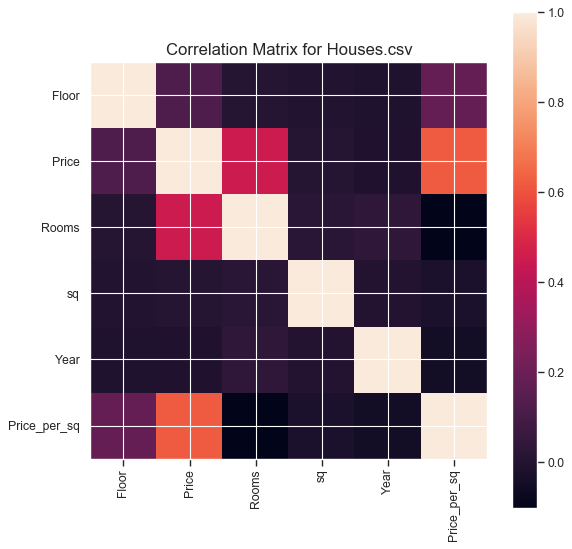

In [20]:
plotCorrelationMatrix(df, 8)

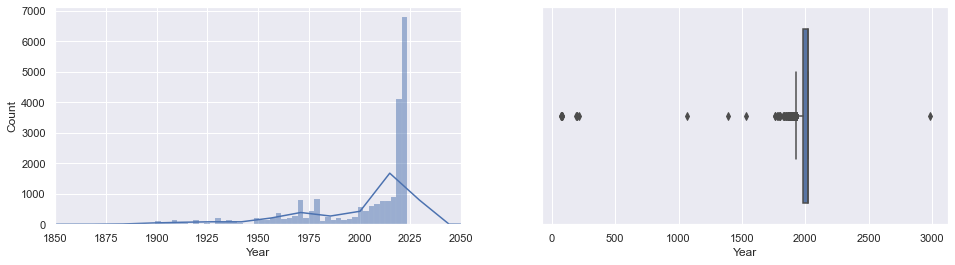

In [22]:
# Year

fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['Year'], data=df, kde=True, ax=ax[0], stat= "count")
ax[0].set_xlim([1850,2050])
sns.boxplot(x=df['Year'], data=df, ax=ax[1])
plt.show()

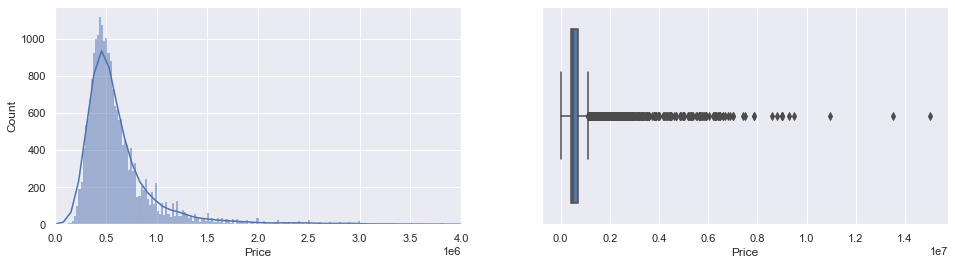

In [23]:
# Price

fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['Price'], data=df, kde=True, ax=ax[0])
ax[0].set_xlim([0,4000000])
sns.boxplot(x=df['Price'], data=df, ax=ax[1])
plt.show()

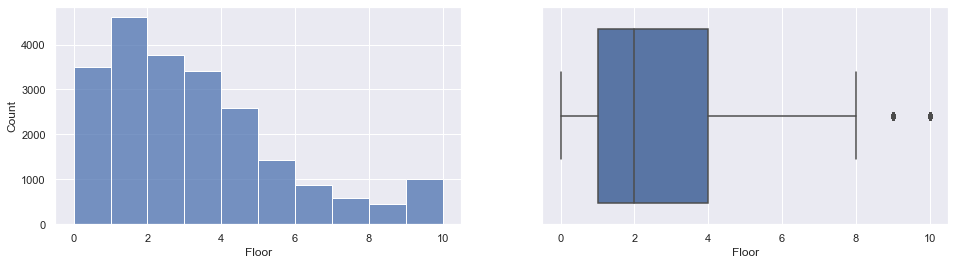

In [24]:
# Floor
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['Floor'], data=df, bins=10, ax=ax[0])
sns.boxplot(x=df['Floor'], data=df, ax=ax[1])
plt.show()

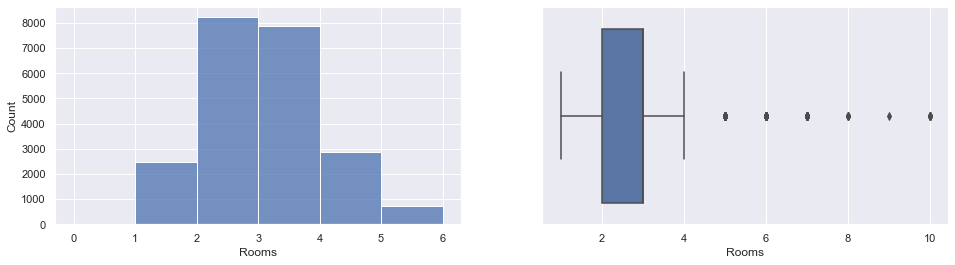

In [25]:
# Rooms

fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['Rooms'], data=df, bins=list(range(0,7)), ax=ax[0])
sns.boxplot(x=df['Rooms'], data=df, ax=ax[1])
plt.show()

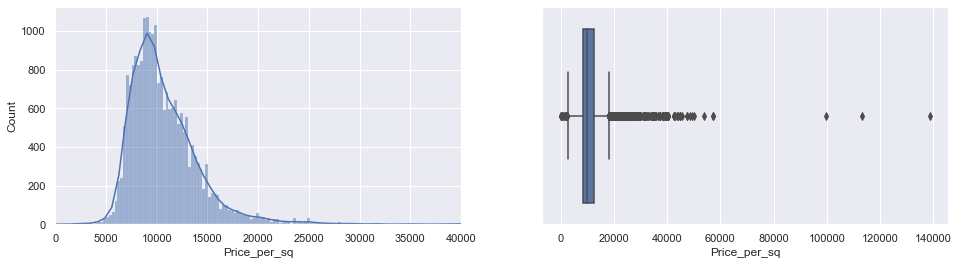

In [26]:
# Price_per_sq

fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['Price_per_sq'], data=df, kde=True, ax=ax[0])
ax[0].set_xlim([0,40000])
sns.boxplot(x=df['Price_per_sq'], data=df, ax=ax[1])
plt.show()

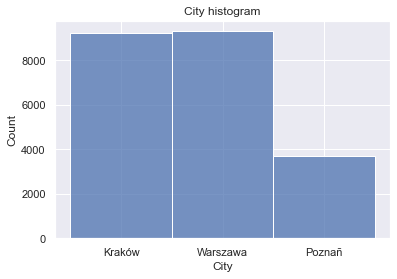

In [27]:
# City

sns.histplot(x=df['City'], data=df)
plt.title("City histogram")
plt.show()

In [28]:
# sq

#fig, ax = plt.subplots(1,2, figsize=(16,4))
#sns.histplot(x=df['sq'], data=df, kde=True, ax=ax[0])
#sns.boxplot(x=df['sq'], data=df, ax=ax[1])
#plt.show()

# Handling with outliners

In [29]:
# Checking df

df.describe()

# the min and max values of'year' and 'sq' have no sense, it means there are wrong values in df

,Floor,Price,Rooms,sq,Year,Price_per_sq
count,22225.000000,2.222500e+04,22225.000000,2.222500e+04,22225.000000,22225.000000
mean,2.814488,6.544162e+05,2.617683,1.058202e+02,1999.967244,10810.198477
std,2.464417,5.437284e+05,1.000505,6.756115e+03,49.124076,3905.967188
min,0.000000,5.000000e+03,1.000000,8.800000e+00,70.000000,1.000000
25%,1.000000,4.150000e+05,2.000000,4.200000e+01,1983.000000,8443.750000
50%,2.000000,5.250000e+05,3.000000,5.399000e+01,2018.000000,9989.930000
75%,4.000000,7.021850e+05,3.000000,6.890000e+01,2021.000000,12368.420000
max,10.000000,1.500000e+07,10.000000,1.007185e+06,2980.000000,138636.360000


In [30]:
# Removing extreme ouliners

sq_extr = df.loc[df['sq'] > 2000].index.tolist()
df.drop(sq_extr, axis=0, inplace=True)

In [31]:
# Limiting the year

year_extr = df.loc[(df['Year'] > 2025) & (df['Year'] < 1900)].index.tolist()
df.drop(year_extr, axis=0, inplace=True)

# Removing extreme ouliners 'Price_per_sq'

price_per_sq_extr = df.loc[df['Price_per_sq'] > 50000].index.tolist()
df.drop(price_per_sq_extr, axis=0, inplace=True)

In [32]:
# Ouliners

cols_to_cap = ['sq', 'Year', 'Price_per_sq']

for col in cols_to_cap:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper_bound = Q3 + (1.5*IQR)
    lower_bound = Q1 - (1.5*IQR)

    df[col] = np.where(df[col] > upper_bound, upper_bound,
                      np.where(df[col] < lower_bound, lower_bound, df[col]))

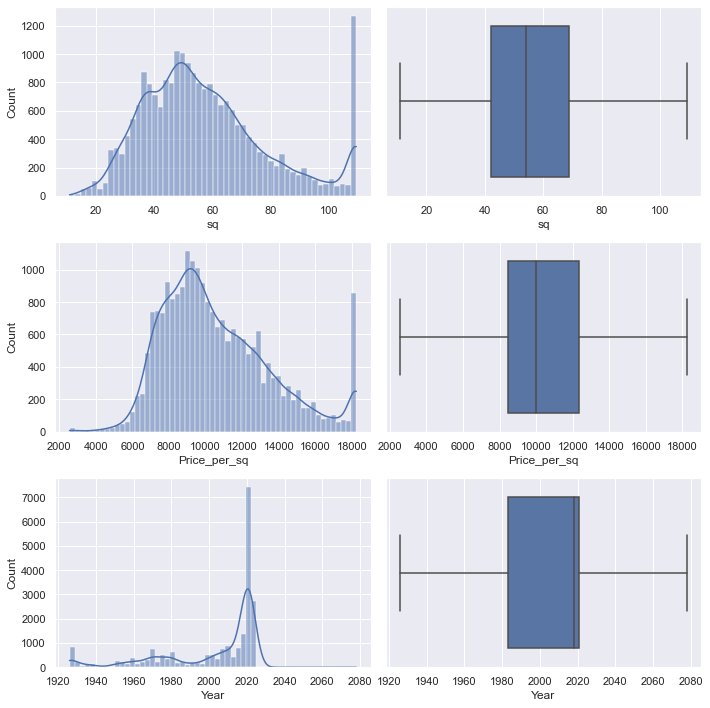

In [33]:
# Plot the results

fig, ax = plt.subplots(3,2, figsize=(10,10))

sns.histplot(x=df['sq'], data=df, kde=True, ax=ax[0,0])
sns.boxplot(x=df['sq'], data=df, ax=ax[0,1])
sns.histplot(x=df['Price_per_sq'], data=df, kde=True, ax=ax[1,0])
sns.boxplot(x=df['Price_per_sq'], data=df, ax=ax[1,1])
sns.histplot(x=df['Year'], data=df, kde=True, ax=ax[2,0])
sns.boxplot(x=df['Year'], data=df, ax=ax[2,1])

plt.tight_layout()
plt.show()

In [34]:
def city_name(row):
    if row == 'Poznañ':
        return 'Poznan'
    elif row == 'Kraków':
        return 'Krakow'
    else:
        return 'Warszawa'

df['City'] = df['City'].apply(lambda x: city_name(x))

In [35]:
df.head()

,Address,City,Floor,Price,Rooms,sq,Year,Price_per_sq
0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Krakow,2,749000.0,3,74.05,2021.0,10114.79
1,Praga-Po³udnie Grochowska,Warszawa,3,240548.0,1,24.38,2021.0,9866.61
2,Krowodrza Czarnowiejska,Krakow,2,427000.0,2,37.00,1970.0,11540.54
3,Grunwald,Poznan,2,1290000.0,5,109.25,1935.0,7771.08
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1,996000.0,5,105.00,2020.0,9485.71


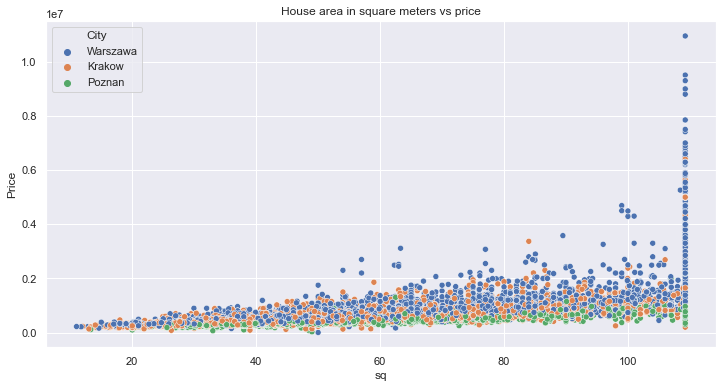

In [36]:
plt.figure(figsize=(12,6))
plt.title("House area in square meters vs price")
sns.scatterplot(x='sq', y='Price', data=df, hue='City', hue_order = ['Warszawa', 'Krakow', 'Poznan'])
plt.show()

# Zmienić y_label

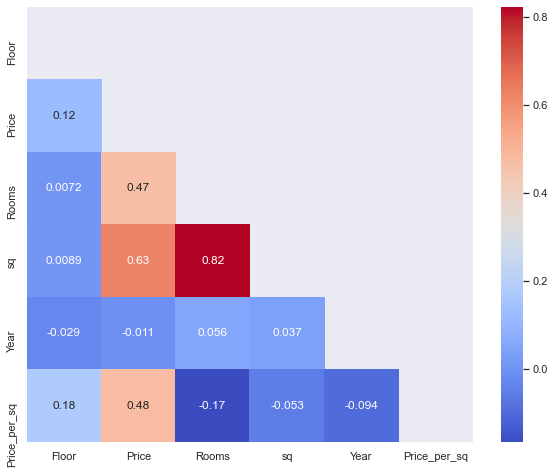

In [37]:
plt.figure(figsize=(10,8))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [38]:
df_copy = df.copy()

In [39]:
dummies = pd.get_dummies(df_copy['City'])
dummies

,Krakow,Poznan,Warszawa
0,1,0,0
1,0,0,1
2,1,0,0
3,0,1,0
4,0,0,1
...,...,...,...
22220,0,0,1
22221,0,1,0
22222,0,1,0
22223,1,0,0


In [40]:
df_copy = pd.concat([df_copy, dummies], axis=1)

In [41]:
df_copy.drop(['Address', 'City', 'Price_per_sq'], axis=1, inplace=True)
df_copy.head()

,Floor,Price,Rooms,sq,Year,Krakow,Poznan,Warszawa
0,2,749000.0,3,74.05,2021.0,1,0,0
1,3,240548.0,1,24.38,2021.0,0,0,1
2,2,427000.0,2,37.00,1970.0,1,0,0
3,2,1290000.0,5,109.25,1935.0,0,1,0
4,1,996000.0,5,105.00,2020.0,0,0,1


In [42]:
X = df_copy.drop('Price', axis=1)
y = df_copy['Price']

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

scaler = StandardScaler()

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42)

# Fitting various models

In [44]:
models = {
    "Linear Regression": LinearRegression(),
    "SGD Regressor": SGDRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Machine": LinearSVR(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGB Regressor": XGBRegressor(random_state=42)
}

In [45]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"Fitted {name}")

Fitted Linear Regression
Fitted SGD Regressor
Fitted K-Nearest Neighbors
Fitted Support Vector Machine
Fitted Decision Tree
Fitted Random Forest
Fitted XGB Regressor


In [46]:
for name, model in models.items():
    print(f"{name} R^2 score: {model.score(X_test, y_test).round(4)}")

Linear Regression R^2 score: 0.453
SGD Regressor R^2 score: 0.4531
K-Nearest Neighbors R^2 score: 0.6542
Support Vector Machine R^2 score: -1.4446
Decision Tree R^2 score: 0.4723
Random Forest R^2 score: 0.7057
XGB Regressor R^2 score: 0.6981


# Random Forest performs best

In [47]:
def get_score_rand_forest(n_estimators):
    rand_forest = RandomForestRegressor(n_estimators=n_estimators, 
                       n_jobs=4, 
                       random_state=42)
    
    rand_forest.fit(X_train, y_train)
    
    return rand_forest.score(X_test, y_test)

In [48]:
results_rand_forest = {}
estimators = [1000, 1300, 1500, 1700, 1900]

for i in estimators:
    results_rand_forest[i] = get_score_rand_forest(i)
    print(f"Fitted Random Forest with {i} estimators")

Fitted Random Forest with 1000 estimators
Fitted Random Forest with 1300 estimators
Fitted Random Forest with 1500 estimators
Fitted Random Forest with 1700 estimators
Fitted Random Forest with 1900 estimators


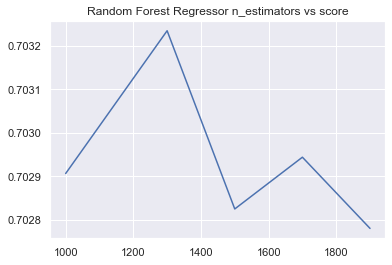

In [49]:
plt.plot(list(results_rand_forest.keys()), list(results_rand_forest.values()))
plt.title("Random Forest Regressor n_estimators vs score")
plt.show()

In [50]:
model = RandomForestRegressor(n_estimators=1300, n_jobs=4, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Final Model MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Final Model R^2: {model.score(X_test, y_test):.4f}")

Final Model MAE: 105425.2757
Final Model R^2: 0.7032


<ipython-input-51-34ae2cd0733d>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


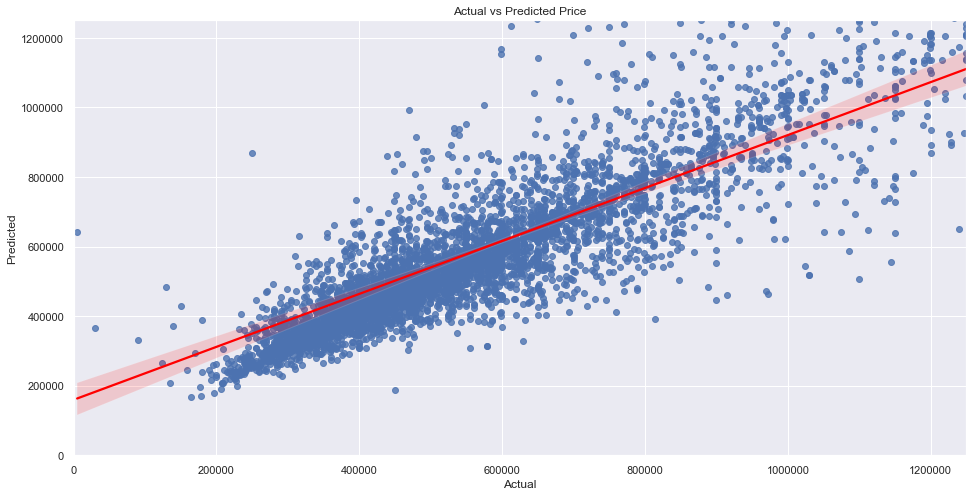

In [51]:
plt.figure(figsize=(16,8))
plt.ticklabel_format(style='plain')
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.title("Actual vs Predicted Price")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.xlim(0, 1250000)
plt.ylim(0, 1250000)
plt.grid(True)
plt.subplot()
plt.show()

# A function that searches for flats that best meet the client's requirements

In [52]:
def choosing(dataframe, item):
    
    df = dataframe
    func_item = item
    
    while True:        
        
        try:
            item = int(input(f'Choose between {df[func_item].min()} and {df[func_item].max()}: '))
            
        except:
            print("\n" + "Sorry, it has to be number! Provide proper value." + "\n")
            continue
            
        else:
            if item > df[func_item].max() or item < df[func_item].min():
                print("\n" + f'Sorry, you are out of the range, choose between {df[func_item].min()} and {df[func_item].max()}!' + "\n")
            else:
                break
                
    return item

In [53]:
## Wybór miasta:

cities = list(set(df['City']))

def city_choose():
    
    print(f'The cities in our database: {cities}')
    
    while True:
        
        try:
            city = str(input(f'Choose the city from our database: '))
            
        except:
            print(f"Sorry it isn't correct name of the city! Choose from {cities}")
            continue
            
        else:
            if city not in cities:
                print(f"Choose the city from the list {cities}")
            else:
                break
                
    return city

In [54]:
def requirements():    
    
    while choosing:

        # Powitanie
        print('Welcome in House Database!')
        print("\n")

        # Client choices:
        print("Select the oldest construction year of the apartment that you can accept (year):")
        max_year_choose = choosing(df, 'Year')
        print("\n")    
        print(f'The oldest acceptaple appartment will be from: {max_year_choose:.0f}')
        print("\n")
        
        print("Do you want a ground floor apartment?")
        while True:
        
            try:
                answer = (str(input(f'Choose Y or N: '))).lower()[0]

            except:
                print(f"I don't understand, choose Y or N!")
                continue

            else:
                if answer == 'y':
                    print("\n")
                    print("You have chosen an apartment on the ground floor.")
                    print("\n")
                    floor_choose = 0
                    choose = False
                    break
                elif answer == 'n':
                    choose = True
                    break
                else:
                    print("\n")
                    print("Provide Y or N.")
                    print("\n")
                    choose = True
                    continue
        
        print("Choose the maximum number of floor you would accept:")
        max_floor_num_choose = choosing(df, 'Floor')
        print("\n")
        print(f'The highest floor is: {max_floor_num_choose}')
        print("\n")

        print(f"Choose the city: ")
        city = city_choose()
        print("\n")
        print(f'Your city: {city}')
        print("\n")

        while True:

            print("Choose the minimum price / m^2:")
            min_price_per_sq_choose = choosing(df, 'Price_per_sq')
            print("Choose the maximum price / m^2:")
            max_price_per_sq_choose = choosing(df, 'Price_per_sq')
            if min_price_per_sq_choose < max_price_per_sq_choose:
                print("\n")
                print(f'The range of price / m^2: {(min_price_per_sq_choose, max_price_per_sq_choose)}')
                price_per_sq_range = range(min_price_per_sq_choose, max_price_per_sq_choose)
                print("\n")
                break
            else:
                print("\n")
                print("I'm sorry but you have to select min and max again because the range you selected is incorrect.")
                print("\n")
                continue
            
            print("Choose the maximum price / m^2:")
            max_price_per_sq_choose = choosing(df, 'Price_per_sq')
            if min_price_per_sq_choose < max_price_per_sq_choose:
                print("\n")
                print(f'The range of price / m^2: {(min_price_per_sq_choose, max_price_per_sq_choose)}')
                price_per_sq_range = range(min_price_per_sq_choose, max_price_per_sq_choose)
                print("\n")
                break
            else:
                print("\n")
                print("I'm sorry but you have to select min and max again because the range you selected is incorrect.")
                print("\n")
                continue

        while True:

            print("Choose the minimum value of m^2:")
            min_sq_choose = choosing(df, 'sq')
            print("Choose the maximum value of m^2:")
            max_sq_choose = choosing(df, 'sq')
            if min_sq_choose < max_sq_choose:
                print("\n")
                print(f'The range of m^2: {(min_sq_choose, max_sq_choose)}')
                sq_range = range(min_sq_choose, max_sq_choose)
                print("\n")
                break
            else:
                print("\n")
                print("I'm sorry but you have to select min and max again because the range you selected is incorrect.")
                print("\n")
                continue

        while True:

            print("Choose the minimum number of rooms:")
            min_rooms_choose = choosing(df, 'Rooms')
            print("Choose the maximum number of rooms:")
            max_rooms_choose = choosing(df, 'Rooms')
            if min_rooms_choose < max_rooms_choose:
                print("\n")
                print(f'The range of rooms: {(min_rooms_choose, max_rooms_choose)}')
                rooms_range = range(min_rooms_choose, max_rooms_choose)
                print("\n")
                break
            else:
                print("\n")
                print("I'm sorry but you have to select min and max again because the range you selected is incorrect.")
                print("\n")
                continue

    # Wybieranie odpowiednich mieszkań z bazy danych na podstawie wymienionych kryteriów klienta:
    
        if choose == False:
            
            df_choosen = df[
                            (df['Year'] >= max_year_choose) & 
                            (df['Floor'] == floor_choose) &  
                            (df['City'] == city) &
                            (df['Price_per_sq'] > 0) &
                            (df['Price_per_sq'] <= max_price_per_sq_choose)
                            ]

            
        else:

            df_choosen = df[
                            (df['Year'] >= max_year_choose) & 
                            (df['Floor'] <= max_floor_num_choose) & 
                            (df['Floor'] > 0) & 
                            (df['City'] == city) &
                            (df['Price_per_sq'] > 0) &
                            (df['Price_per_sq'] <= max_price_per_sq_choose)
                            ]      
            
        
        df_choosen = df_choosen.reset_index(drop=True)
        
        a,b = df_choosen.shape
        
        if a == 0:
            print("We have not found an apartment that meets the selected requirements.")
            print("Do you want to change your requirements?")
            x = str(input(f'Choose Y or N: '))
            if x[0].lower() == 'y':
                continue      

        break
    
    return df_choosen

In [55]:
requirements()

Welcome in House Database!


Select the oldest construction year of the apartment that you can accept (year):
Choose between 1926.0 and 2078.0: sth

Sorry, it has to be number! Provide proper value.

Choose between 1926.0 and 2078.0: 0

Sorry, you are out of the range, choose between 1926.0 and 2078.0!

Choose between 1926.0 and 2078.0: 2021


The oldest acceptaple appartment will be from: 2021


Do you want a ground floor apartment?
Choose Y or N: sth


Provide Y or N.


Choose Y or N: n
Choose the maximum number of floor you would accept:
Choose between 0 and 10: sth

Sorry, it has to be number! Provide proper value.

Choose between 0 and 10: 15

Sorry, you are out of the range, choose between 0 and 10!

Choose between 0 and 10: 3


The highest floor is: 3


Choose the city: 
The cities in our database: ['Poznan', 'Warszawa', 'Krakow']
Choose the city from our database: Poznan


Your city: Poznan


Choose the minimum price / m^2:
Choose between 2561.7437499999987 and 18248.47375: 100

,Address,City,Floor,Price,Rooms,sq,Year,Price_per_sq
0,Nowe Miasto Malta ul. Katowicka,Poznan,3,563905.0,4,77.78,2022.0,7250.00
1,Nowe Miasto Malta ul. Katowicka,Poznan,2,417112.5,2,47.67,2022.0,8750.00
2,Stare Miasto Centrum ul. Ostrów Tumski,Poznan,3,445000.0,2,39.06,2021.0,11392.73
3,Nowe Miasto Kobyle Pole ul. abp. Walentego Dymka,Poznan,3,468300.0,3,66.90,2022.0,7000.00
4,Nowe Miasto Malta ul. Katowicka,Poznan,3,326705.0,2,34.39,2022.0,9500.00
...,...,...,...,...,...,...,...,...
754,Stare Miasto Naramowice,Poznan,2,291542.0,2,38.11,2022.0,7650.01
755,Nowe Miasto Rataje,Poznan,2,288000.0,2,36.21,2022.0,7953.60
756,Je¿yce ul. w. Wawrzyñca 11,Poznan,3,469062.3,2,56.31,2022.0,8330.00
757,Grunwald Jeleniogórska 1/3,Poznan,1,412476.0,2,55.74,2021.0,7400.00
